In [17]:
%config Completer.use_jedi = False

## 7.2 탐색적 데이터 분석

### 7.2.1 데이터 둘러보기

In [18]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [19]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [20]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


* 피처 요약표 만들기

In [21]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [22]:
resumetable(train)

데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [23]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [24]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [25]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


### 7.2.2 데이터 시각화

In [26]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

* 타깃값 분포

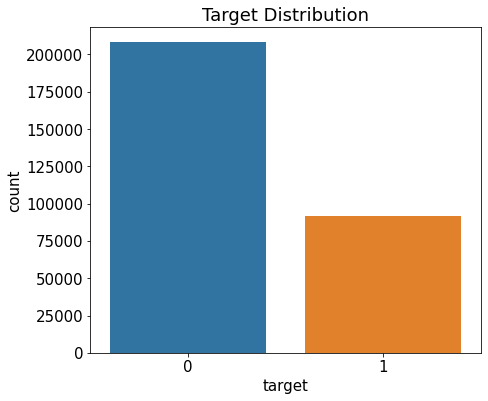

In [27]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution');

In [28]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x7ff6610917d0>, <matplotlib.patches.Rectangle object at 0x7ff64c9218d0>]


In [29]:
rectangle = ax.patches[0] # 첫번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [30]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


Text(0.5, 1.0, 'Train Distribution')

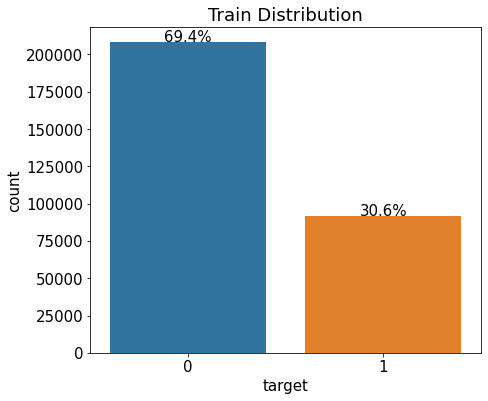

In [31]:
def write_percent(ax,total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100 # 타깃값 비율
        
        #(x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width / 2.0, y=height + total_size * 0.001, s=f'{percent:1.1f}%', ha='center')


plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Train Distribution')

* 이진 피처 분포

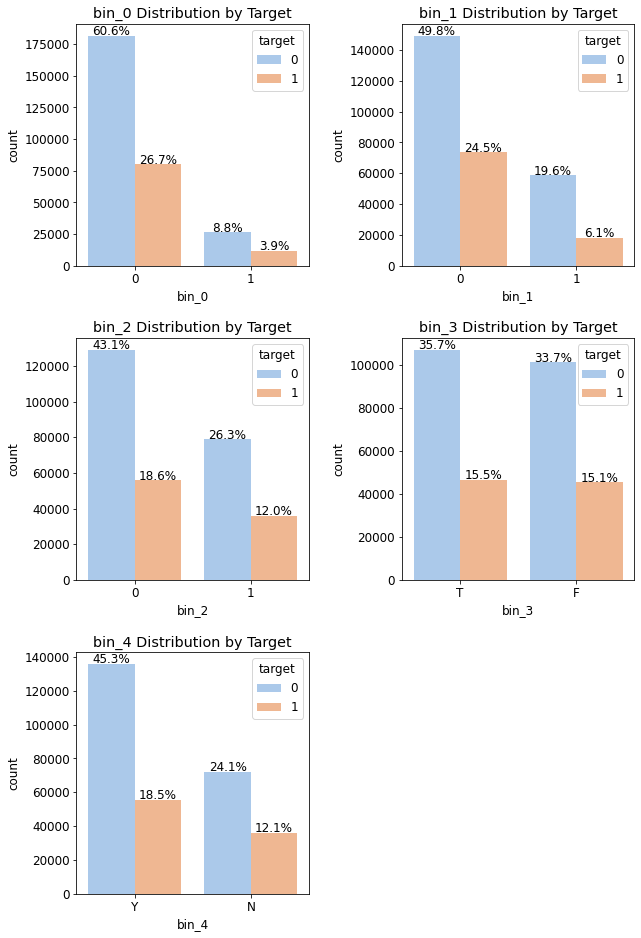

In [32]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치
# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브 플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature, data=train, hue='target', palette='pastel', ax=ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

* 명목형 피처 분포

#### 스텝1: 교차분석표 생성 함수 만들기

* **교차표**(cross-tabulation) 혹은 **교차분석표**는 범주형 데이터 2개를 비교 분석하는 데 사용되는 표이다.

In [33]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [34]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [35]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [36]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [37]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


#### 스텝2: 포인트플롯 생성 함수 만들기

In [38]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, color='black', legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')
    

#### 스텝3: 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [42]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} Distribution')

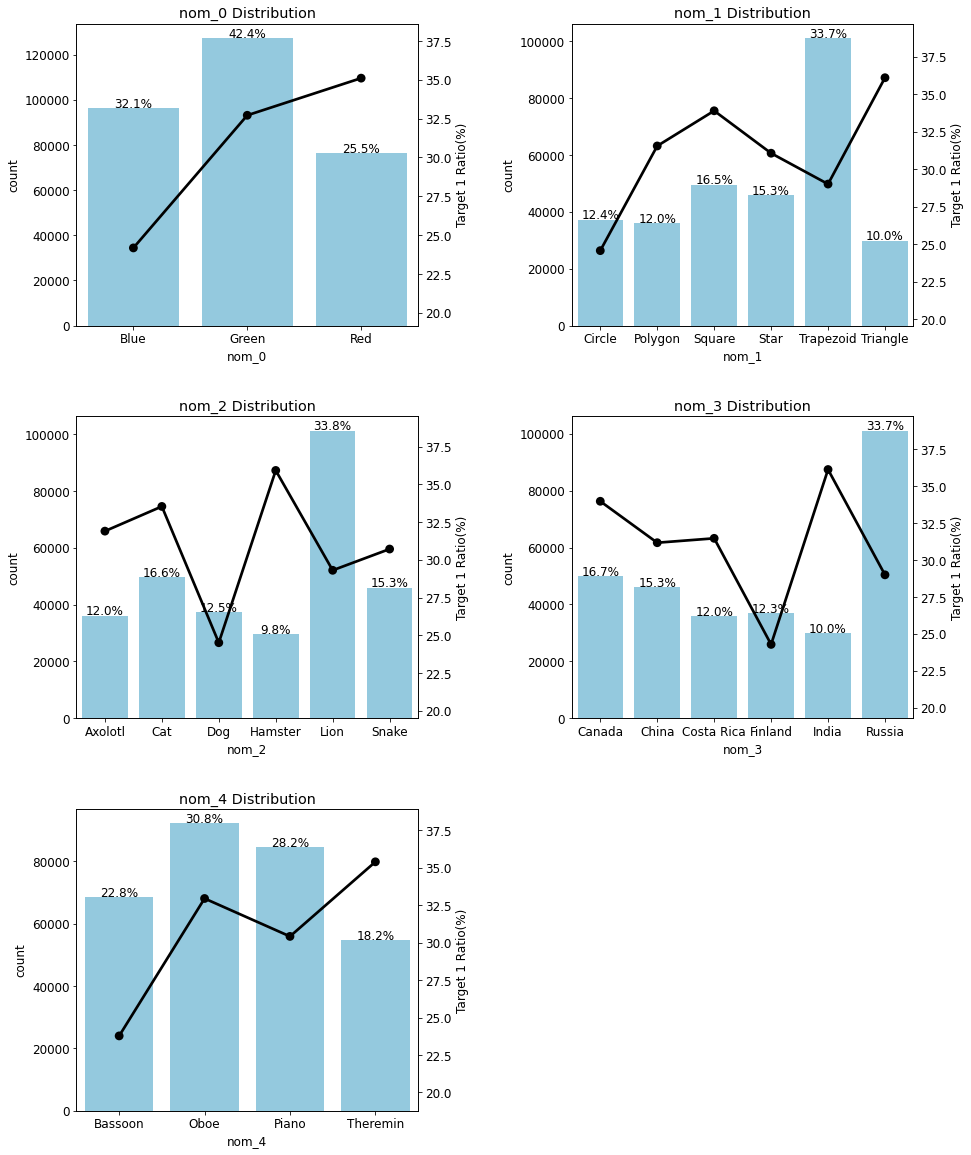

In [43]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

* 순서형 피처 분포

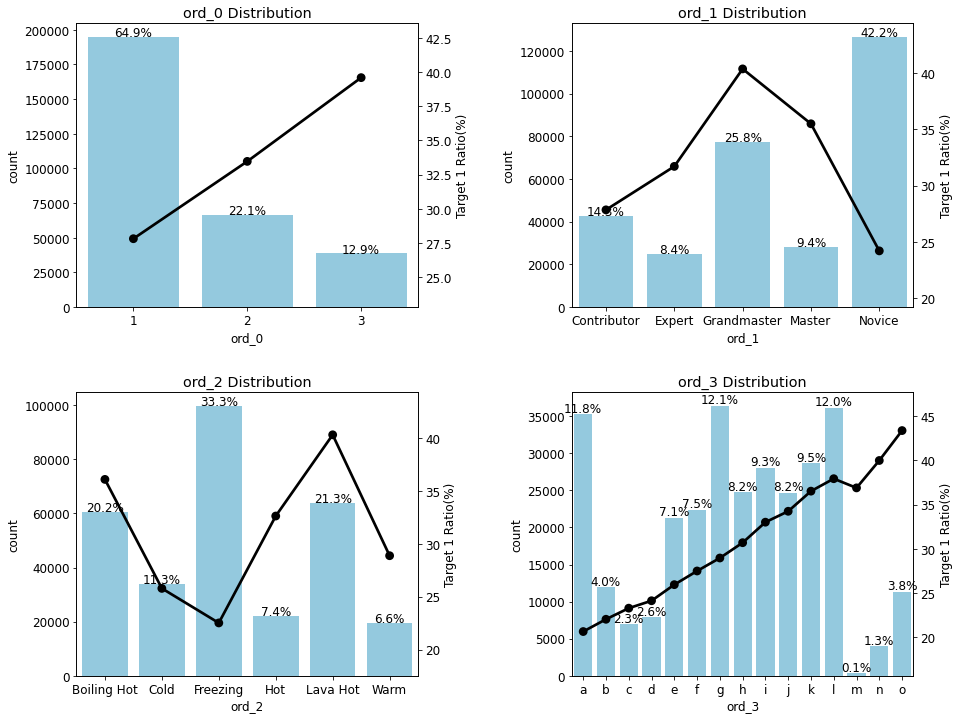

In [44]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

In [45]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'GrandMaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

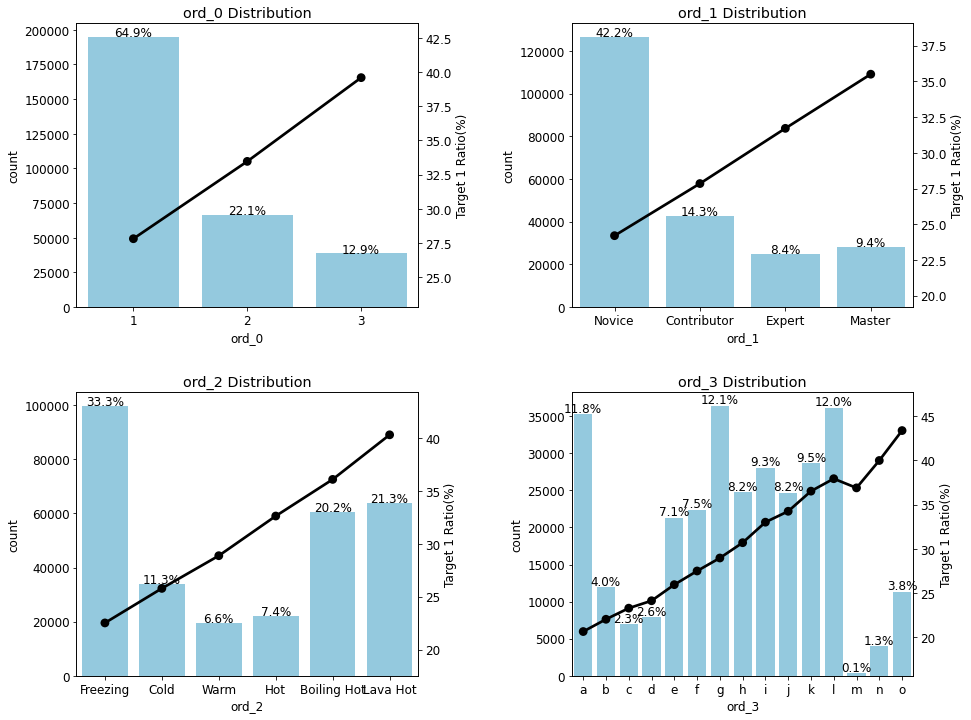

In [46]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

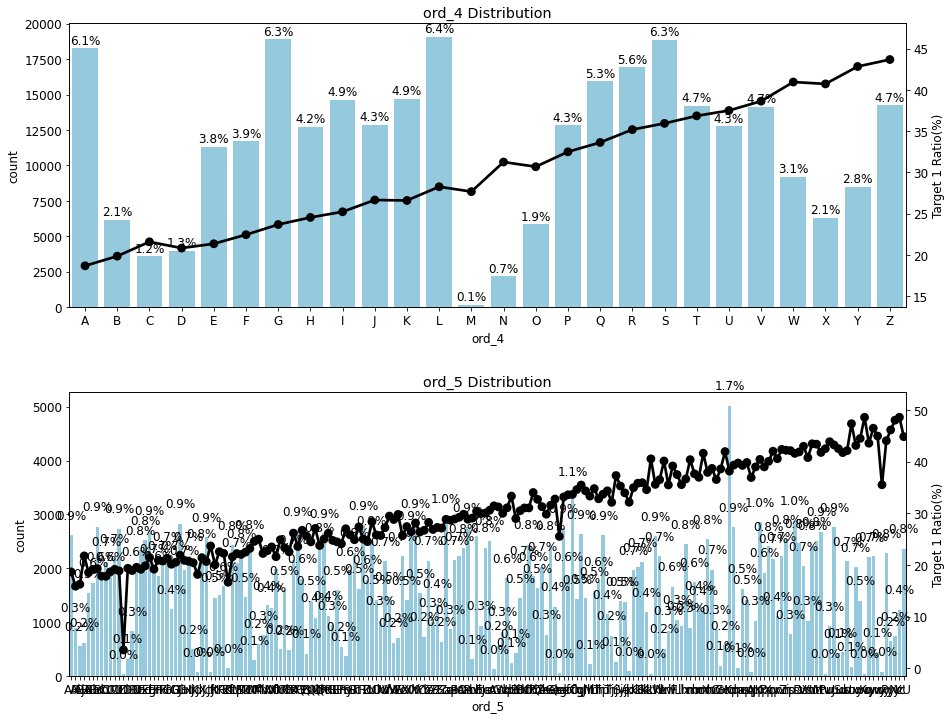

In [47]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

* 날짜 피처 분포

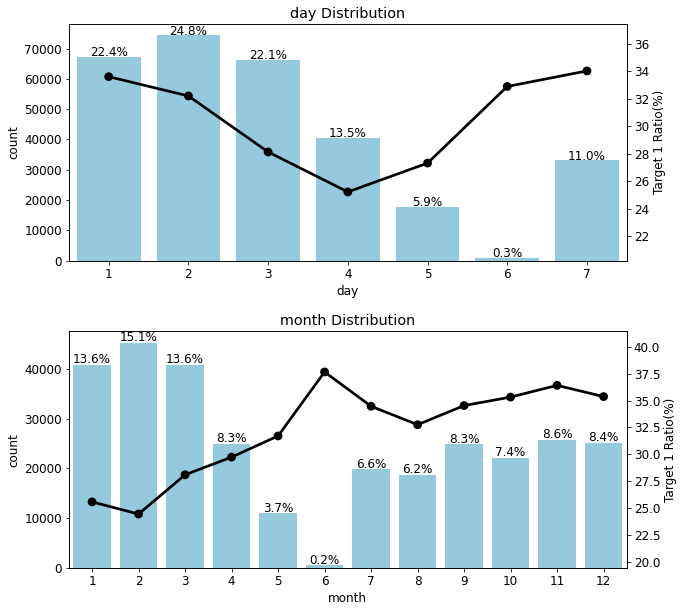

In [48]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10, 10))

## 분석 정리 및 모델링 전략

* 분석 정리
    * 결측값은 없다.
    * 모든 피처가 중요하여 제거할 피처를 찾지 못했다.
    * **이진 피처 인코딩**: 값이 숫자가 아닌 이진 피처는 0과 1로 인코딩한다.
    * **명목형 피처 인코딩**: 전체 데이터가 크지 않으므로 모두 원-핫 인코딩한다.
    * **순서형 피처 인코딩**: 고윳값들의 순서에 맞게 인코딩한다.(이미 숫자로 되어 있다면 인코딩 필요 없음)
    * **날짜 피처 인코딩**: 값의 크고 작음으로 해석되지 못하도록 원-핫 인코딩한다.
* 모델링 전략  
이번장의 목표 -> 데이터 특성에 따른 맞춤형 인코딩 방법을 익히기.
    * 베이스라인 모델: 로지스틱 회귀 모델
        * 피처 엔지니어링 : 모든 피처를 원-핫 인코딩
    * 성능 개선: 추가 피처 엔지니어링과 하이퍼파라미터 최적화
        * 피처 엔지니어링 : 피처 맞춤 인코딩과 피처 스케일링
        * 하이퍼파라미터 최적화: 그리드서치
        * 추가 팁: 검증 데이터를 훈련에 이용